In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import scipy.stats as stats
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from osgeo import gdal
import xarray as xr
from scipy.io import loadmat
from matplotlib.ticker import PercentFormatter
from matplotlib import rcParams
rcParams['patch.force_edgecolor'] = True   # show edgecolor

# Read Data

In [2]:
results = loadmat('Data/barmah_full_5thres_results.mat')
results.keys()

dict_keys(['__header__', '__version__', '__globals__', 'BP', 'MC', 'bifurc', 'gzh', 'height_22', 'height_23', 'length_22', 'length_23', 'maxleeangle_22', 'maxleeangle_23', 'meanleeangle_22', 'meanleeangle_23', 'n', 'ngxh', 'ngyh', 'ogxh', 'ogyh', 'steep_face', 'xr', 'yr', 'zr'])

In [3]:
MC = results['MC']
CL = MC['CL']
#print(CL['NumObjects'])
print(type(CL))
print((CL[0]).shape)
print((CL[0]).dtype)
num_objects = CL[0][0]['NumObjects']
print(num_objects)  # Print the value of NumObjects


<class 'numpy.ndarray'>
(1,)
object
[[array([[264]], dtype=uint16)]]


In [4]:
h22 = results['height_22'].flatten()
l22 = results['length_22'].flatten()
maxA22 = results['maxleeangle_22'].flatten()
h23 = results['height_23'].flatten()
l23 = results['length_23'].flatten()
maxA23 = results['maxleeangle_23'].flatten()

maxlength = 85
minA = 1

ID = l22 < maxlength
l22 = l22[ID]
h22 = h22[ID]
maxA22 = maxA22[ID]
ID = maxA22 > minA
l22 = l22[ID]
h22 = h22[ID]
maxA22 = maxA22[ID]
ID = h22 > 0.05
l22 = l22[ID]
h22 = h22[ID]
maxA22 = maxA22[ID]


ID2 = l23 < maxlength
l23 = l23[ID2]
h23 = h23[ID2]
maxA23 = maxA23[ID2]
ID2 = maxA23 > minA
l23 = l23[ID2]
h23 = h23[ID2]
maxA23 = maxA23[ID2]
ID2 = h23 > 0.05
l23 = l23[ID2]
h23 = h23[ID2]
maxA23 = maxA23[ID2]

# Plots


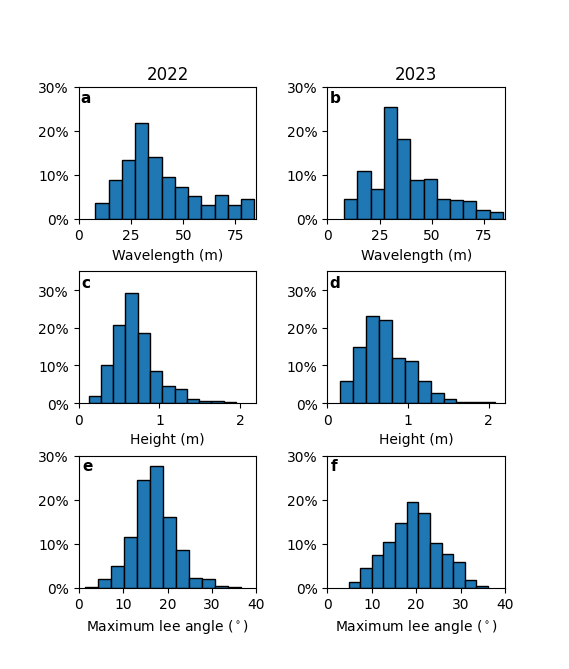

In [5]:
draft = False
fig =plt.gcf()
ax00 = fig.add_axes([0,0,1,1])
ax00.patch.set_alpha(0)
ax00.set_zorder(1)

if draft: #if draft is true
    plt.xticks([]) #removes ticks
    plt.yticks([])
else:
    plt.axis('off') #turns outside axis off

ax1 = plt.subplot(3,2,1)
plt.title('2022',fontsize=12)
plt.hist(l22, weights=np.ones(len(l22)) / len(l22), bins = 12)
plt.xlabel('Wavelength (m)')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1, decimals=0))
plt.ylim(0,0.3)
plt.xlim(0,85)

ax2 = plt.subplot(3,2,2)
plt.title('2023',fontsize=12)
plt.hist(l23, weights=np.ones(len(l23)) / len(l23), bins = 12)
plt.xlabel('Wavelength (m)')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1, decimals=0))
plt.ylim(0,0.3)
plt.xlim(0,85)

ax3 = plt.subplot(3,2,3)
plt.hist(h22, weights=np.ones(len(h22)) / len(h22), bins = 12)
plt.xlabel('Height (m)')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1, decimals=0))
plt.ylim(0,0.35)
plt.xlim(0,2.2)

ax4 = plt.subplot(3,2,4)
plt.hist(h23, weights=np.ones(len(h23)) / len(h23), bins = 12)
plt.xlabel('Height (m)')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1, decimals=0))
plt.ylim(0,0.35)
plt.xlim(0,2.2)

ax5 = plt.subplot(3,2,5)
plt.hist(maxA22, weights=np.ones(len(maxA22)) / len(maxA22), bins = 12)
plt.xlabel('Maximum lee angle ($^\\circ$)')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1, decimals=0))
plt.ylim(0,0.3)
plt.xlim(0,40)

ax6 = plt.subplot(3,2,6)
plt.hist(maxA23, weights=np.ones(len(maxA23)) / len(maxA23), bins = 12)
plt.xlabel('Maximum lee angle ($^\\circ$)')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1, decimals=0))
plt.ylim(0,0.3)
plt.xlim(0,40)

plt.subplots_adjust(wspace=0.4)
plt.subplots_adjust(hspace=0.4)
fig.set_size_inches(5.5, 6.5)

# making a,b,c figure labels
ax1.text(1, 0.26,'a',fontsize=11, weight='bold', horizontalalignment='left', verticalalignment='bottom')
ax2.text(1, 0.26, 'b',fontsize=11, weight='bold', horizontalalignment='left', verticalalignment='bottom')
ax3.text(0.03, 0.3,'c',fontsize=11, weight='bold', horizontalalignment='left', verticalalignment='bottom')
ax4.text(0.03, 0.3, 'd',fontsize=11, weight='bold', horizontalalignment='left', verticalalignment='bottom')
ax5.text(0.8, 0.26,'e',fontsize=11, weight='bold', horizontalalignment='left', verticalalignment='bottom')
ax6.text(0.8, 0.26, 'f',fontsize=11, weight='bold', horizontalalignment='left', verticalalignment='bottom')


if draft==False:
    #plt.savefig('curvi_method_example.pdf',dpi=300) #saving figure if not a draft
    plt.savefig('barmah_hist_python.png',dpi=300)